In [1]:
%matplotlib inline
import pandas as pd

In [2]:
titles = [] # list of news titles
categories = [] # list of news categories
labels = [] # list of different categories (without repetitions)
nlabels = 4 # number of different categories
lnews = [] # list of dictionaries with two fields: one for the news and 
            # the other for its category

In [ ]:
read_file = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx')
read_file.to_csv (r'Path to store the CSV file\File name.csv', index = None, header=True)

In [13]:
def import_data():
    global titles, labels, categories
    # importing news aggregator data via Pandas (Python Data Analysis Library)
    file = r'/content/News Title.xls'  
    news = pd.read_excel(file)
    # function 'head' shows the first 5 items in a column (or
    # the first 5 rows in the DataFrame)
    print(news.head())
    categories = news['Category']
    titles = news['News Title']
    labels = sorted(list(set(categories)))

In [14]:
%time import_data()

   No                                         News Title       Category
0   1  Google+ rolls out 'Stories' for tricked out ph...     Technology
1   2                    Dov Charney's Redeeming Quality       Business
2   3   White God adds Un Certain Regard to the Palm Dog  Entertainment
3   4  Google shows off Androids for wearables, cars,...     Technology
4   5         China May new bank loans at 870.8 bln yuan       Business
CPU times: user 1.09 s, sys: 38.4 ms, total: 1.12 s
Wall time: 1.13 s


In [15]:
from collections import Counter

def count_data(labels,categories):    
    c = Counter(categories)
    cont = dict(c)
    # total number of news
    tot = sum(list(cont.values()))     
    d = {
        "category" : labels,
        "news" : [cont[l] for l in labels],
        "percent" : [cont[l]/tot for l in labels]
    }
   
    print(pd.DataFrame(d))   
    print("total \t",tot) 
    
    return cont

cont = count_data(labels,categories)

        category   news   percent
0       Business  17707  0.270192
1  Entertainment  23961  0.365621
2        Medical   7091  0.108202
3     Technology  16776  0.255985
total 	 65535


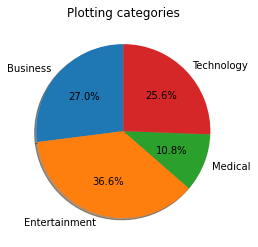

In [16]:
import pylab as pl # useful for drawing graphics

def categories_pie_plot(cont,tit):
    global labels
    sizes = [cont[l] for l in labels]
    pl.pie(sizes, explode=(0, 0, 0, 0), labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=90)
    pl.title(tit)
    pl.show()
    
categories_pie_plot(cont,"Plotting categories")

## Split dataset

In [18]:
from sklearn.utils import shuffle # Shuffle arrays in a consistent way

X_train = []
y_train = []
X_test = []
y_test = []

def split_data():
    global titles, categories
    global X_train, y_train, X_test, y_test,labels
    N = len(titles)
    Ntrain = int(N * 0.7)    
    # Let's shuffle the data
    titles, categories = shuffle(titles, categories, random_state=0)
    X_train = titles[:Ntrain]
    y_train = categories[:Ntrain]
    X_test = titles[Ntrain:]
    y_test = categories[Ntrain:]

In [19]:
%time split_data()

CPU times: user 12.1 ms, sys: 13 µs, total: 12.1 ms
Wall time: 13.5 ms


In [20]:
#Waktu yang dibutuhkan untuk membagi data adalah 13.5 detik. Sekarang mari kita menganalisis proporsi kategori berita di set pelatihan.
cont2 = count_data(labels,y_train)


        category   news   percent
0       Business  12304  0.268213
1  Entertainment  16795  0.366112
2        Medical   5026  0.109561
3     Technology  11749  0.256115
total 	 45874


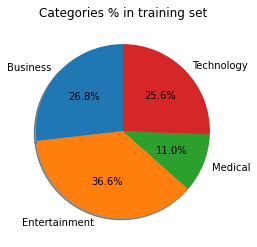

In [21]:
#Persentase sangat dekat dengan yang diperoleh untuk seluruh kumpulan data.
categories_pie_plot(cont2,"Categories % in training set")

## Train and test the classifier

In [22]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import Pipeline 
from sklearn import metrics 
import numpy as np
import pprint

# lmats = [] # list of confussion matrix 
nrows = nlabels
ncols = nlabels
# conf_mat_sum = np.zeros((nrows, ncols))
# f1_acum = [] # list of f1-score

def train_test():
    global X_train, y_train, X_test, y_test, labels 
    #lmats, \
     #       conf_mat_sum, f1_acum, ncategories
    text_clf = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf', MultinomialNB()),
                         ])
    text_clf = text_clf.fit(X_train, y_train)
    predicted = text_clf.predict(X_test)
    return predicted

In [23]:
%time predicted = train_test()


CPU times: user 891 ms, sys: 5.04 ms, total: 896 ms
Wall time: 914 ms


In [24]:
metrics.accuracy_score(y_test, predicted)

0.896241289863181

In [25]:
print(metrics.classification_report(y_test, predicted, target_names=labels))

               precision    recall  f1-score   support

     Business       0.87      0.89      0.88      5403
Entertainment       0.91      0.97      0.94      7166
      Medical       0.98      0.69      0.81      2065
   Technology       0.88      0.88      0.88      5027

     accuracy                           0.90     19661
    macro avg       0.91      0.86      0.88     19661
 weighted avg       0.90      0.90      0.89     19661



In [28]:
def resume_data(labels,y_train,f1s):
    c = Counter(y_train)
    cont = dict(c)
    tot = sum(list(cont.values()))
    nlabels = len(labels)
    d = {
        "category" : [labels[i] for i in range(nlabels)],
        "percent" : [cont[labels[i]]/tot for i in range(nlabels)],
        "f1-score" : [f1s[i] for i in range(nlabels)]
    }
   
    print(pd.DataFrame(d))   
    print("total \t",tot) 
    return cont

In [29]:
f1s = metrics.f1_score(y_test, predicted, labels=labels, average=None)
cont3 = resume_data(labels,y_train,f1s)

        category   percent  f1-score
0       Business  0.268213  0.879287
1  Entertainment  0.366112  0.940733
2        Medical  0.109561  0.809321
3     Technology  0.256115  0.879341
total 	 45874
